## ***Savita's Boutique (Fashion Retail) Data Analysis Project***

As the Operational Manager and Sales Analyst at Savita's Boutique, I embarked on a comprehensive analysis of our point-of-sale data. Focused on unraveling insights, my mission is to empower decision-making and uncover trends that will elevate our business strategy. Join me in this journey through the data-driven exploration of Savita's Boutique, where every observation unveils an opportunity.


## ***AI-Driven Data Analysis***

In conducting the analysis for Savita's Boutique, I utilized my generative AI skills on the ChatGPT platform to create a virtual assistant. This AI-driven assistant streamlined the data analysis process, expediting code development and fostering a collaborative synergy between my expertise and AI capabilities.


### ***EDA: Exploratory Data Analysis***

#### **Import Libraries and Load Datsets**

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
suppliers = pd.read_csv("C:/Users/azhar/Desktop/Python/Savitas Boutique/suppliers.csv")

In [3]:
customers = pd.read_csv("C:/Users/azhar/Desktop/Python/Savitas Boutique/customers.csv")

In [4]:
suppliers.head(5)

,Transaction_id,Date,Supplier_Name,Category,Quantity,Tax,Selling_Price,Cost_Price,Gross_Profit,Discount,Supplier_Location
0,2,06-03-2022,Pehnava,Dress,1,0.0,3100,1550,1550.0,550.0,Mumbai
1,3,06-03-2022,Pehnava,Dress,1,0.0,4100,1750,2350.0,400.0,Mumbai
2,3,06-03-2022,Pehnava,Dress,1,0.0,3200,1800,1400.0,650.0,Mumbai
3,4,06-03-2022,Savita's Design,Dress,1,0.0,17500,17500,0.0,10000.0,Nashik
4,5,06-03-2022,Pehnava,Dress,1,0.0,2000,1095,905.0,550.0,Mumbai


In [5]:
customers.head(5)

,Transaction_id,Date,Customer_Name,Quantity,Tax,Selling_Price,Cost_Price,Gross_Profit
0,2,6/3/2022,Dr.Snehal Desai,1,0,3100.0,1550.0,1550.0
1,3,6/3/2022,Meena Mehta,3,0,10400.0,5100.0,5300.0
2,4,6/3/2022,Dr.Vaishali Chopra,1,0,17500.0,17500.0,0.0
3,5,6/3/2022,Leena Sapkale,2,0,4500.0,2490.0,2010.0
4,6,8/3/2022,Pranita Patil,3,0,11000.0,6195.0,4805.0


In [6]:

# Merge DataFrames based on 'Transaction_id'
merged_data = pd.merge(suppliers, customers, on='Transaction_id', how='inner')

# Select the desired columns
boutique = merged_data[['Transaction_id', 'Date_x', 'Supplier_Name', 'Category', 'Quantity_x', 'Tax_x',
                         'Selling_Price_x', 'Cost_Price_x', 'Gross_Profit_x', 'Discount', 'Supplier_Location',
                         'Customer_Name']]

# Rename columns if needed (suffixes '_x' were added due to column name conflicts)
boutique = boutique.rename(columns={'Date_x': 'Date', 'Quantity_x': 'Quantity', 'Tax_x': 'Tax',
                                      'Selling_Price_x': 'Selling_Price', 'Cost_Price_x': 'Cost_Price',
                                      'Gross_Profit_x': 'Gross_Profit'})

# Display the resulting DataFrame
boutique.head()


,Transaction_id,Date,Supplier_Name,Category,Quantity,Tax,Selling_Price,Cost_Price,Gross_Profit,Discount,Supplier_Location,Customer_Name
0,2,06-03-2022,Pehnava,Dress,1,0.0,3100,1550,1550.0,550.0,Mumbai,Dr.Snehal Desai
1,3,06-03-2022,Pehnava,Dress,1,0.0,4100,1750,2350.0,400.0,Mumbai,Meena Mehta
2,3,06-03-2022,Pehnava,Dress,1,0.0,3200,1800,1400.0,650.0,Mumbai,Meena Mehta
3,3,16-03-2022,Pehnava,Dress,1,0.0,2350,1550,800.0,750.0,Mumbai,Meena Mehta
4,4,06-03-2022,Savita's Design,Dress,1,0.0,17500,17500,0.0,10000.0,Nashik,Dr.Vaishali Chopra


In [7]:
boutique.shape

(1996, 12)

In [8]:
boutique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_id     1996 non-null   int64  
 1   Date               1996 non-null   object 
 2   Supplier_Name      1996 non-null   object 
 3   Category           1996 non-null   object 
 4   Quantity           1996 non-null   int64  
 5   Tax                1996 non-null   float64
 6   Selling_Price      1996 non-null   int64  
 7   Cost_Price         1996 non-null   int64  
 8   Gross_Profit       1996 non-null   float64
 9   Discount           1996 non-null   float64
 10  Supplier_Location  1996 non-null   object 
 11  Customer_Name      1996 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 187.2+ KB


#### **Grand Total Overview: Financial Insights**

In [9]:

# Calculate grand total
grand_total = boutique.agg({
    'Quantity': 'sum',
    'Selling_Price': 'sum',
    'Cost_Price': 'sum',
    'Discount': 'sum',
    'Tax': 'sum',
    'Gross_Profit': 'sum'
})

# Convert values to millions with two decimal points
grand_total['Selling_Price'] = round(grand_total['Selling_Price'] / 1e6, 2)
grand_total['Cost_Price'] = round(grand_total['Cost_Price'] / 1e6, 2)
grand_total['Discount'] = round(grand_total['Discount'] / 1e6, 2)
grand_total['Tax'] = round(grand_total['Tax'] / 1e6, 2)
grand_total['Gross_Profit'] = round(grand_total['Gross_Profit'] / 1e6, 2)

# Display the grand total table
print("Grand Total (Values In Million):")
print(grand_total)


Grand Total (Values In Million):
Quantity         2509.00
Selling_Price      14.44
Cost_Price          8.90
Discount            3.41
Tax                 0.14
Gross_Profit        5.62
dtype: float64


#### **Category-wise Analysis: Sales and Profits**

In [10]:

# Group data by 'Category' and aggregate metrics
category_analysis = boutique.groupby('Category').agg({
    'Quantity': 'sum',
    'Selling_Price': 'sum',
    'Gross_Profit': 'sum',
    # Add more metrics as needed
}).reset_index()

# Sort the DataFrame by total profit (or any other relevant metric)
category_analysis = category_analysis.sort_values(by='Gross_Profit', ascending=False)

# Print or display the category-wise analysis
print(category_analysis)


    Category  Quantity  Selling_Price  Gross_Profit
1      Dress      2344       13281033     5220174.1
8      Saree        64         535186      188443.0
2    Dupatta        40         270125       91716.0
5      Kurti        15          92550       37368.0
3     Ghagra         2          48175       19445.0
0   Anarkali         4          89900       18255.0
6    Palazzo         8          33403       14768.0
7       Pant        19          29976       13127.0
10       Top         6          35700       11740.0
9    Sharara         4          11380        4867.0
4    Kaftaan         3          10125        2525.0


#### **Descriptive Analysis**

In [11]:
# Select columns for descriptive analysis
selected_columns = ['Cost_Price', 'Selling_Price', 'Gross_Profit', 'Discount']

# Descriptive analysis for selected columns
descriptive_stats = boutique[selected_columns].describe()

# Display the descriptive statistics
print(descriptive_stats)


         Cost_Price  Selling_Price  Gross_Profit      Discount
count   1996.000000    1996.000000   1996.000000   1996.000000
mean    4457.852705    7233.242986   2816.847745   1708.135656
std     5164.162459    7596.126999   3008.171406   2276.712766
min      475.000000     950.000000      0.000000      0.000000
25%     1698.750000    3195.000000   1264.250000    350.000000
50%     2750.000000    4950.000000   1973.000000   1000.000000
75%     5000.000000    8425.000000   3426.250000   2100.000000
max    62000.000000  109175.000000  46089.000000  24405.769230


#### **Create New Column for Price Ranges (Low, Medium and High)**

In [12]:

# Calculate the quantiles for cost price
low_quantile = boutique['Cost_Price'].quantile(0.5)
medium_quantile_lower = boutique['Cost_Price'].quantile(0.5)
medium_quantile_upper = boutique['Cost_Price'].quantile(0.75)

# Create a new column 'Price_Range' based on cost price quantiles
boutique['Price_Range'] = pd.cut(
    boutique['Cost_Price'],
    bins=[-float('inf'), low_quantile, medium_quantile_upper, float('inf')],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

# Display the first few rows of the DataFrame with the new 'Price_Range' column
boutique.head()


,Transaction_id,Date,Supplier_Name,Category,Quantity,Tax,Selling_Price,Cost_Price,Gross_Profit,Discount,Supplier_Location,Customer_Name,Price_Range
0,2,06-03-2022,Pehnava,Dress,1,0.0,3100,1550,1550.0,550.0,Mumbai,Dr.Snehal Desai,Low
1,3,06-03-2022,Pehnava,Dress,1,0.0,4100,1750,2350.0,400.0,Mumbai,Meena Mehta,Low
2,3,06-03-2022,Pehnava,Dress,1,0.0,3200,1800,1400.0,650.0,Mumbai,Meena Mehta,Low
3,3,16-03-2022,Pehnava,Dress,1,0.0,2350,1550,800.0,750.0,Mumbai,Meena Mehta,Low
4,4,06-03-2022,Savita's Design,Dress,1,0.0,17500,17500,0.0,10000.0,Nashik,Dr.Vaishali Chopra,High


In [13]:
boutique.to_csv('new_dataframe.csv', index=False)

#### **Price Range Summary**

In [14]:

# Group by 'Price_Range' and aggregate sum for relevant columns
price_range_summary = boutique.groupby('Price_Range', observed=False).agg({
    'Quantity': 'sum',
    'Cost_Price': 'sum',
    'Selling_Price': 'sum',
    'Gross_Profit': 'sum'
}).reset_index()

# Display the summary table
print("Summary by Price Range:")
print(price_range_summary)

# Get user input for specific details
detail_input = input("\nDo you want specific details for suppliers or customers? (Type 'Y' for yes, 'N' for no): ").lower()

if detail_input == 'y':
    # Get user input for supplier or customer
    sc_input = input("Do you want details for a specific supplier or customer? (Type 'S' for supplier, 'C' for customer): ").lower()

    if sc_input == 's':
        # Get user input for supplier name
        supplier_name = input("Enter the name of the supplier: ")

        # Filter data for the specified supplier
        supplier_details = boutique[boutique['Supplier_Name'] == supplier_name].groupby('Price_Range', observed=False).agg({
            'Quantity': 'sum',
            'Cost_Price': 'sum',
            'Selling_Price': 'sum',
            'Gross_Profit': 'sum'
        }).reset_index()

        # Display the details for the specific supplier
        print(f"\nDetails for Supplier {supplier_name}:")
        print(supplier_details)

    elif sc_input == 'c':
        # Get user input for customer name
        customer_name = input("Enter the name of the customer: ")

        # Filter data for the specified customer
        customer_details = boutique[boutique['Customer_Name'] == customer_name].groupby('Price_Range', observed=False).agg({
            'Quantity': 'sum',
            'Cost_Price': 'sum',
            'Selling_Price': 'sum',
            'Gross_Profit': 'sum'
        }).reset_index()

        # Display the details for the specific customer
        print(f"\nDetails for Customer {customer_name}:")
        print(customer_details)

    else:
        print("Invalid input. Please type 'S' for supplier or 'C' for customer.")

elif detail_input == 'n':
    print("No specific details requested. Exiting...")

else:
    print("Invalid input. Please type 'Y' for yes or 'N' for no.")


Summary by Price Range:
  Price_Range  Quantity  Cost_Price  Selling_Price  Gross_Profit
0         Low      1044     1780622        3426289     1622866.0
1      Medium       577     1780648        3093366     1299693.0
2        High       888     5336604        7917898     2699869.1



Do you want specific details for suppliers or customers? (Type 'Y' for yes, 'N' for no):  y
Do you want details for a specific supplier or customer? (Type 'S' for supplier, 'C' for customer):  s
Enter the name of the supplier:  Harsh Fabrics



Details for Supplier Harsh Fabrics:
  Price_Range  Quantity  Cost_Price  Selling_Price  Gross_Profit
0         Low       148      274375         519234      239809.0
1      Medium       116      329566         566860      233096.0
2        High        74      304035         496543      187569.0


### ***Supplier and Customer Dynamics***

#### **Top Suppliers** **And** **Top Customers**

In [15]:

# Get user input for whether to see top or lowest and for supplier or customer
sc_input = input("Do you want to see top or lowest for suppliers or customers? (Type 'S' for supplier, 'C' for customer): ").lower()

if sc_input in ['s', 'c']:
    # Get user input for top or lowest
    user_input = input(f"Enter 'top' or 'lowest' to see the corresponding {'' if sc_input == 's' else 'customer'}: ").lower()

    if user_input not in ['top', 'lowest']:
        print("Invalid input. Please enter 'top' or 'lowest'.")
    else:
        # Group by supplier or customer and aggregate the total quantity sold and sum of selling prices
        group_column = 'Supplier_Name' if sc_input == 's' else 'Customer_Name'
        selling_entities = boutique.groupby(group_column).agg({
            'Quantity': 'sum',
            'Selling_Price': 'sum'
        }).reset_index()

        # Sort the DataFrame by quantity in either ascending or descending order based on user input
        sort_order = False if user_input == 'top' else True
        selling_entities = selling_entities.sort_values(by='Quantity', ascending=sort_order)

        # Display the top or lowest selling entities with total quantity and total selling price
        print(f"\n{user_input.capitalize()} Selling {'' if sc_input == 's' else 'Customers' if sc_input == 'c' else 'Suppliers'}:")
        print(selling_entities.head())

else:
    print("Invalid input. Please type 'S' for supplier or 'C' for customer.")
    

Do you want to see top or lowest for suppliers or customers? (Type 'S' for supplier, 'C' for customer):  c
Enter 'top' or 'lowest' to see the corresponding customer:  top



Top Selling Customers:
        Customer_Name  Quantity  Selling_Price
108   Mandakini Patil       201        1421018
266  Vaishali R Patil       178        1264781
31        Bharti Wagh       164        1189756
167     Pranita Patil       142        1107605
144       Naina Patil        74         639390


#### **Name of Unique Customers for Particular Supplier**

In [16]:

# Get user input for the supplier name
selected_supplier = input("Enter the supplier name: ")

# Filter the data for the selected supplier
supplier_data = boutique[boutique['Supplier_Name'] == selected_supplier]

# Check if the selected supplier exists in the data
if supplier_data.empty:
    print(f"No data found for the supplier: {selected_supplier}")
else:
    # Get the number of unique customers who bought products from the selected supplier
    unique_customers = supplier_data['Customer_Name'].nunique()

    # Display the result
    print(f"Number of unique customers who bought products of {selected_supplier}: {unique_customers}")

    # Ask the user whether to display the list of customers
    show_customer_list = input("Do you want to see the list of customers? (yes/no): ").lower()

    if show_customer_list == 'yes':
        # Display the list of unique customers
        customer_list = supplier_data['Customer_Name'].unique()
        print(f"List of customers who bought products of {selected_supplier}:\n{', '.join(customer_list)}")
    elif show_customer_list == 'no':
        print("Okay, no customer list will be displayed.")
    else:
        print("Invalid input. Please enter 'yes' or 'no'.")


Enter the supplier name:  Asopalav


Number of unique customers who bought products of Asopalav: 3


Do you want to see the list of customers? (yes/no):  yes


List of customers who bought products of Asopalav:
Vaishali R Patil, Jayashree Pawar, Bharti Wagh


#### **Customer-wise Purchase History**

In [17]:

# Get user input for the customer name
selected_customer = input("Enter the customer name: ")

# Filter the data for the selected customer
customer_data = boutique[boutique['Customer_Name'] == selected_customer]

# Check if the selected customer exists in the data
if customer_data.empty:
    print(f"No data found for the customer: {selected_customer}")
else:
    # Group by supplier and aggregate quantity, selling price, and profit
    supplier_details = customer_data.groupby('Supplier_Name').agg({
        'Quantity': 'sum',
        'Selling_Price': 'sum',
        'Gross_Profit': 'sum'
    }).reset_index()

    # Calculate profit margin (assuming profit is in dollars)
    supplier_details['Profit_Margin'] = (supplier_details['Gross_Profit'] / supplier_details['Selling_Price']) * 100

    # Sort the results by quantity in descending order
    supplier_details = supplier_details.sort_values(by='Quantity', ascending=False)

    # Display the result
    print(f"Details for {selected_customer}'s purchases:")
    print(supplier_details)
    

Enter the customer name:  Vaishali R Patil


Details for Vaishali R Patil's purchases:
              Supplier_Name  Quantity  Selling_Price  Gross_Profit  \
12                  Pehnava        53         272833      122115.0   
0                       ADA        23         351975      125952.0   
14                     TATA        19          46500       20917.0   
13          Savita's Design        16         121720       46864.0   
15                  Vandana        15         103055       27850.0   
7             Harsh Fabrics        13          65558       28602.0   
11                   Neelam        11          86635       32983.0   
6                       H V         9          62400       20793.0   
8   Lucknow Chicken Factory         3          21800        5151.0   
1                       Ada         3          36675       13185.0   
4                    Bansal         3          21640        7424.0   
2           Akhlaque Ansari         3          16500        7711.0   
10                  Nazakat         2          2

#### **RFM Analysis: Segmentation and Customer Value**

In [18]:

# Convert 'Date' column to datetime type
boutique['Date'] = pd.to_datetime(boutique['Date'], format='%d-%m-%Y')

# Calculate the recency, frequency, and monetary (RFM) metrics
current_date = boutique['Date'].max()
rfm_data = boutique.groupby('Customer_Name').agg({
    'Date': lambda x: (current_date - x.max()).days,  # Recency
    'Transaction_id': 'count',  # Frequency
    'Gross_Profit': 'sum'  # Monetary
}).reset_index()

# Rename the columns
rfm_data.columns = ['Customer_Name', 'Recency', 'Frequency', 'Monetary']

# Define segmentation criteria based on quartiles or specific thresholds
recency_threshold = rfm_data['Recency'].quantile(0.5)
frequency_threshold = rfm_data['Frequency'].quantile(0.5)
monetary_threshold = rfm_data['Monetary'].quantile(0.5)

# Create customer segments
rfm_data['Segment'] = 'Low-Value'
rfm_data.loc[(rfm_data['Recency'] <= recency_threshold) & 
              (rfm_data['Frequency'] >= frequency_threshold) & 
              (rfm_data['Monetary'] >= monetary_threshold), 'Segment'] = 'High-Value'
rfm_data.loc[(rfm_data['Recency'] <= recency_threshold) & 
              (rfm_data['Frequency'] >= frequency_threshold) & 
              (rfm_data['Monetary'] < monetary_threshold), 'Segment'] = 'Regular'

# Display the segmented data
print(rfm_data.head())

# Function to get customers in a specific segment
def get_customers_in_segment(data, segment):
    customers_in_segment = data[data['Segment'] == segment]['Customer_Name'].unique()

    if len(customers_in_segment) > 0:
        print(f"\nCustomers in the {segment} segment:\n")
        for customer in customers_in_segment:
            print(customer)
    else:
        print(f"No customers found in the {segment} segment")

# Get input from the user for the desired segment
segment_input = input("\nEnter the segment ('Low-Value', 'High-Value', or 'Regular'): ")

# Check if the input is a valid segment
if segment_input in ['Low-Value', 'High-Value', 'Regular']:
    # Call the function to get customers in the specified segment
    get_customers_in_segment(rfm_data, segment_input)
else:
    print("Invalid segment input. Please enter 'Low-Value', 'High-Value', or 'Regular'.")


      Customer_Name  Recency  Frequency  Monetary     Segment
0        A Deshmukh      285          3    8805.0   Low-Value
1  Aahuja Deffodils      313          1     270.0   Low-Value
2    Aarti Gajariya       96          1    1554.0   Low-Value
3       Aarti Patil       22         10    6387.0  High-Value
4     Aarusha Patil       70          7   22792.0  High-Value



Enter the segment ('Low-Value', 'High-Value', or 'Regular'):  Low-Value



Customers in the Low-Value segment:

A Deshmukh
Aahuja Deffodils
Aarti Gajariya
Akshada Kalunke
Alfiya Khan
Amruta Gujrathi
Anjali Yeole
Ankita Joshi
Aparna Karwande
Archana Hire
Asha Patil
Ashlesha Deshmukh
Avni Kediya
Bhagyashree Avasarkar
Bharti Aaher
Bharti Rawat
Bharti Tambe
Bharti Thakkar
D J Sonavne
Daivyani Patil
Deepa Chavhan
Deepa Gokhle
Devyani Bhor
Dipali Patkar
Dr.Aautade
Dr.Kakatkar
Dr.Kotkar
Dr.P Pallavi
Dr.Pallavi
Dr.Snehal Desai
Dr.Sunita Pawar
Dr.Vaishali Chopra
Dr.Vaishu Gaikar
Dsouza Didi
Geeta Narang
Geeta Powar
Grover Grover
Jadhav Male
Jain Bhabhi
Jaya Bhamre
Jayashree Gadekar
Jayashree Shinde
Jayashri Khanpurkar
Jayshri Suryavanshi
Joshna Shette
Jyoti Grover
Jyotsna Shete
Kalyani Chaudhari
Kalyani More
Kalyani Shrode
Kanak Patel
Karan Hisariya
Kavita Agrawal
Kedge Ma'am
Kt Kulkarni
Kunda Vaishanpai
Lakshmi Nagesh
Lata Bathiya
Lata Ranade
Leena Gujrathi
Leena Sapkale
Madhavi Joshi
Madhuri Kulkarni
Mamta Dhole
Mangal Patil
Manisha S.Kar
Manisha Sharma
Manisha She

In [19]:
rfm_data.to_csv('rfm_data.csv', index=False)

### **Data Visualisation**

#### **Customer Journey Mapping**

Enter the customer name:  Bunty Vanjari


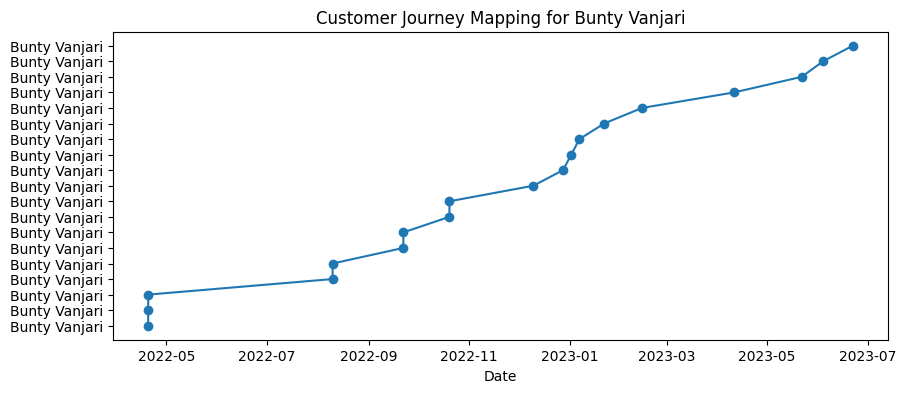



# Explanation
The customer journey mapping illustrates the interactions of Bunty Vanjari with Savita's Boutique over time.
Each data point represents a transaction, and the y-axis corresponds to the chronological order of transactions.


In [20]:

# Convert 'Date' column to datetime type
boutique['Date'] = pd.to_datetime(boutique['Date'], format='%d-%m-%Y')

# Get user input for the customer name
selected_customer = input("Enter the customer name: ")

# Filter the data for the selected customer
customer_data = boutique[boutique['Customer_Name'] == selected_customer]

# Check if the selected customer exists in the data
if customer_data.empty:
    print(f"No data found for the customer: {selected_customer}")
else:
    # Sort the data by date for the selected customer
    customer_data = customer_data.sort_values('Date')

    # Create the customer journey mapping
    plt.figure(figsize=(10, 4))
    plt.plot(customer_data['Date'], range(len(customer_data)), marker='o')
    plt.title(f'Customer Journey Mapping for {selected_customer}')
    plt.xlabel('Date')
    plt.yticks(range(len(customer_data)), customer_data['Customer_Name'])
    plt.show()

    # Auto-generated explanation
    explanation = f"\n\n# Explanation\n"
    explanation += f"The customer journey mapping illustrates the interactions of {selected_customer} with Savita's Boutique over time."
    explanation += f"\nEach data point represents a transaction, and the y-axis corresponds to the chronological order of transactions."

    print(explanation)


#### **Exploring the Relationship between Gross Profit and Discounts**

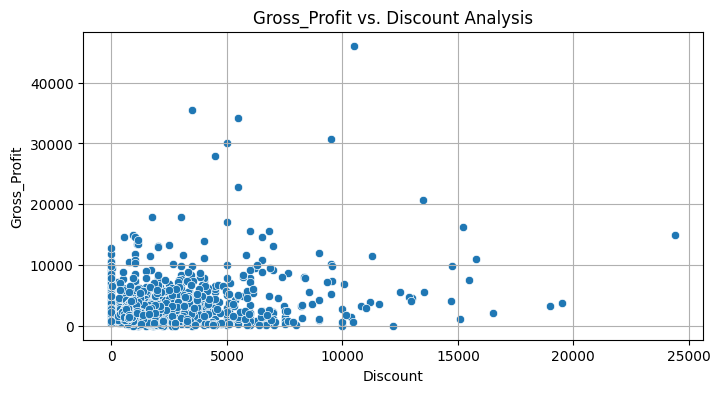

Correlation between Profit and Discount: 0.2456272268024322


In [21]:

# Step 7: Profit and Discount Analysis
import seaborn as sns

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 4))
sns.scatterplot(data=boutique, x='Discount', y='Gross_Profit')
plt.title('Gross_Profit vs. Discount Analysis')
plt.xlabel('Discount')
plt.ylabel('Gross_Profit')
plt.grid(True)
plt.show()

# Calculate correlation between profit and discount
correlation = boutique['Gross_Profit'].corr(boutique['Discount'])
print(f"Correlation between Profit and Discount: {correlation}")


#### **Analyzing Sales Trends Over Time: Unveiling Patterns and Insights**

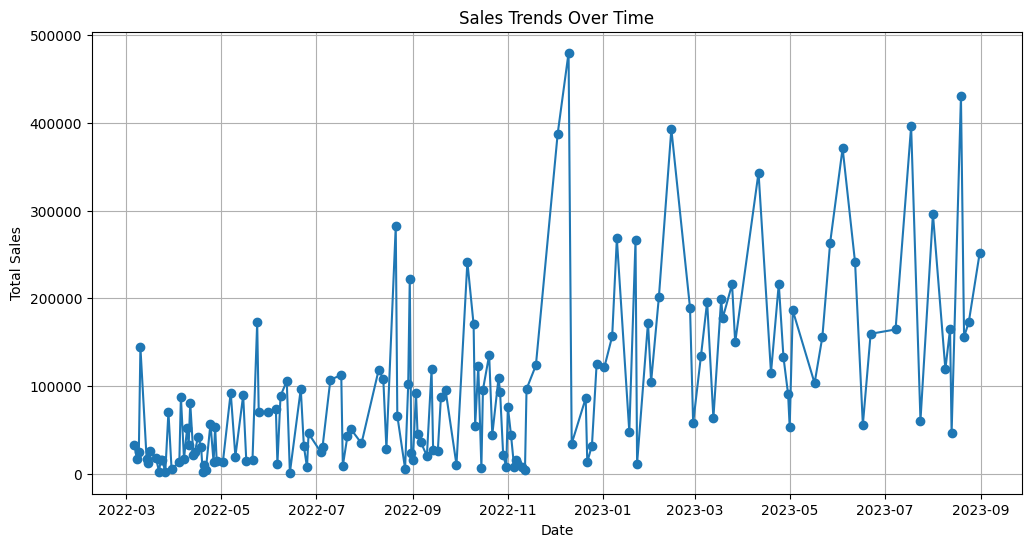

In [22]:

# Step 6: Trends Over Time
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime type
boutique['Date'] = pd.to_datetime(boutique['Date'], format='%d-%m-%Y')

# Group by date and calculate total sales
sales_over_time = boutique.groupby('Date')['Selling_Price'].sum().reset_index()

# Plotting the sales trends
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['Date'], sales_over_time['Selling_Price'], marker='o', linestyle='-')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


## ***Extra Work***

### **Price Sensitivity Analysis: Understanding Customer Preferences**

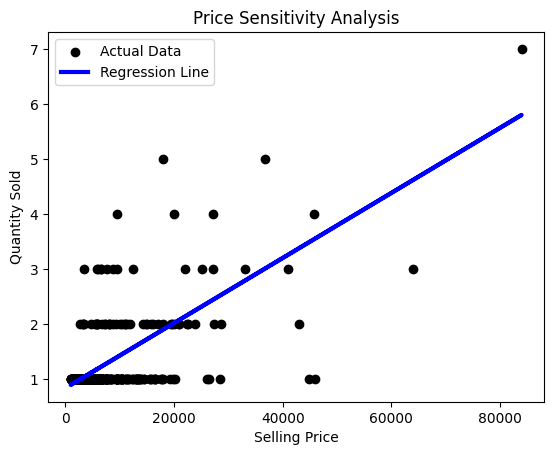

Mean Squared Error: 0.3008565455924003


# Explanation
The Mean Squared Error (MSE) is positive, indicating the model's performance in predicting quantity sold.


In [23]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select relevant columns for price sensitivity analysis
price_sensitivity_data = boutique[['Selling_Price', 'Quantity']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(price_sensitivity_data['Selling_Price'].values.reshape(-1, 1),
                                                    price_sensitivity_data['Quantity'].values, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the results
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.title('Price Sensitivity Analysis')
plt.xlabel('Selling Price')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Auto-generated explanation
explanation = "\n\n# Explanation\n"

if mse >= 0:
    explanation += "The Mean Squared Error (MSE) is positive, indicating the model's performance in predicting quantity sold."
else:
    explanation += "The Mean Squared Error (MSE) is negative, which is unexpected in a regression context."

print(explanation)


### **Elbow Method and Customer Segmentation Perspectives**

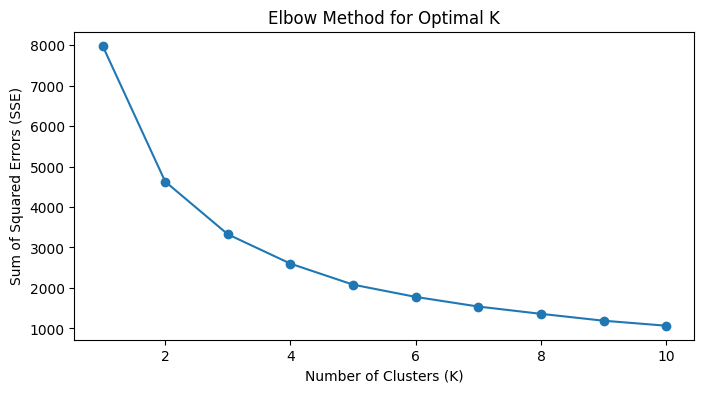

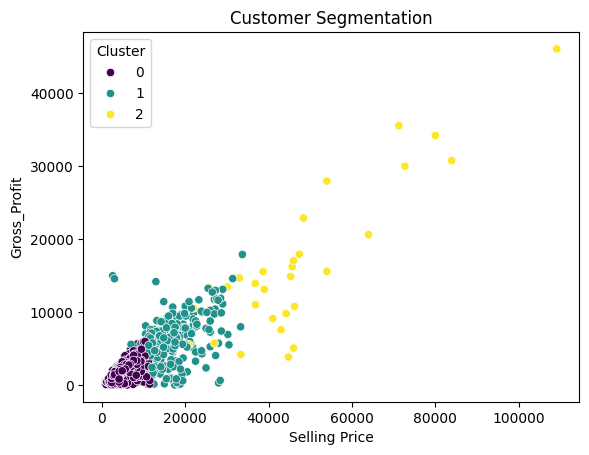

Optimal number of clusters (K) based on Elbow Method: 3
Customer Segmentation Results:
Cluster
0    1632
1     332
2      32
Name: count, dtype: int64


In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def perform_customer_segmentation(data):
    # Select relevant columns for segmentation
    segmentation_data = data[['Selling_Price', 'Cost_Price', 'Quantity', 'Gross_Profit']]

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(segmentation_data)

    # Determine the optimal number of clusters using the Elbow Method
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(scaled_data)
        sse.append(kmeans.inertia_)

    # Plot the Elbow Method graph
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, 11), sse, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.show()

    # Based on the Elbow Method, choose the optimal number of clusters (K)
    optimal_k = 3

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    data['Cluster'] = kmeans.fit_predict(scaled_data)

    # Visualize the clusters
    sns.scatterplot(x='Selling_Price', y='Gross_Profit', hue='Cluster', data=data, palette='viridis')
    plt.title('Customer Segmentation')
    plt.xlabel('Selling Price')
    plt.ylabel('Gross_Profit')
    plt.show()

    # Explain the results
    print(f"Optimal number of clusters (K) based on Elbow Method: {optimal_k}")
    print("Customer Segmentation Results:")
    print(data['Cluster'].value_counts())

   

# Assuming 'boutique' is the DataFrame with the merged data
perform_customer_segmentation(boutique)


#### **List Of Customer Names Cluster-wise**

In [25]:

def find_customers_in_cluster(data):
    # Get user input for the desired cluster
    cluster_input = input("Enter the cluster (0, 1, or 2): ")

    # Check if the input is a valid cluster
    if cluster_input.isdigit() and int(cluster_input) in [0, 1, 2]:
        desired_cluster = int(cluster_input)

        # Get a list of customers in the specified cluster
        customers_in_cluster = data[data['Cluster'] == desired_cluster]['Customer_Name'].unique()

        if len(customers_in_cluster) > 0:
            print(f"\nCustomers in Cluster {desired_cluster}:\n")
            for customer in customers_in_cluster:
                print(customer)
        else:
            print(f"No customers found in Cluster {desired_cluster}")
    else:
        print("Invalid cluster input. Please enter 0, 1, or 2.")

# Assuming 'boutique' is the DataFrame with the merged data
find_customers_in_cluster(boutique)


Enter the cluster (0, 1, or 2):  1



Customers in Cluster 1:

Dr.Vaishali Chopra
Dr.Neeta Gangurde
Sunita Samant
Naina Patil
Mandakini Patil
Priyanka More
Kt Kulkarni
Moniika Gadre
Dsouza Didi
Dr.Smita Pawar
Vaishali R Patil
Sunita Dhangar
Mrunalini Chitte
Chaitali Boraste
Dr.Mauskar
Bharti Wagh
Pratibha Bhadane
Pranita Patil
Suvarna Chavhaan
Suchitra Kadam
Jyoti Jadhav
Neha Patil
Samta Dolis
Harshada Dakhne
Shainaz Shaikh
Snehal Joshi
Geeta Powar
Jayahree N Pawar
Jayashree Pawar
Sulbha Ahire
Jyoti Thakkar
Kiran Burkul
Pooja Oak
Joshna Shette
Unnamed Unnamed
Sneha Joshi
Ashwini Bhathkhande
Prarthana Nagarkar
Jayashree Khanapure
Shreya Pawar
Manjit Jalota
Grover Grover
Shradha Mane
Bunty Vanjari
Akshada Kalunke
Dr.Pallavi
Dr.P Pallavi
Soni Sidhhi
Shilpa Kotwal
Pallavi Dharmadhikari
Yogita Chavhan
Savita Patil
Daivyani Patil
Shobha Shinde
Mamta Kulkarni
Pushpi Dutt
Mrs Daffidils
Madhuri Patil
Shobha Gajariya
Jayasree Patil
Kalyani Chaudhari
Bharti Tambe
Mrs Birari
Mayur Alankar
Shreya P
Sanjana Jain
Fauzia Kulkarni
Anita N

## ***Thank You***